### Import your libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast 
from collections import Counter
from wordcloud import WordCloud 

### Load your dataset

In [3]:
df = pd.read_csv('HR_Missing_Vslues.csv')

### Explore your data 

* First 5 recods
* Last 5 records 
* Check data type
* Show statistical summary 
* Is there any missing values ?
* Applay two more data analysis from your choose 

In [68]:
df

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0
4,NaN,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,NaN,Production,Kissy Sullivan,20.0,LinkedIn,13.0
307,"Ybarra, Catherine",10301,48513.0,19,Production Technician I,NaN,F,Single,Asian,9/2/2008,9/29/2015,Production,Brannon Miller,12.0,Google Search,4.0
308,NaN,10010,220450.0,6,CIO,NaN,F,Single,White,4/10/2010,NaN,IT/IS,Janet King,2.0,Employee Referral,16.0
309,"Zhou, Julia",10043,89292.0,9,Data Analyst,02/24/79,F,Single,White,3/30/2015,NaN,IT/IS,Simon Roup,4.0,Employee Referral,0


In [5]:
df.dtypes

Employee_Name         object
EmpID                  int64
Salary               float64
PositionID             int64
Position              object
DOB                   object
Sex                   object
MaritalDesc           object
RaceDesc              object
DateofHire            object
DateofTermination     object
Department            object
ManagerName           object
ManagerID            float64
RecruitmentSource     object
Absences             float64
dtype: object

In [6]:
df.describe()

,EmpID,Salary,PositionID,ManagerID,Absences
count,311.000000,249.000000,311.000000,303.000000,280.000000
mean,10156.000000,67972.662651,16.845659,14.570957,10.128571
std,89.922189,22995.908395,6.223419,8.078306,5.946407
min,10001.000000,45046.000000,1.000000,1.000000,1.000000
25%,10078.500000,55315.000000,18.000000,10.000000,4.750000
50%,10156.000000,62957.000000,19.000000,15.000000,10.000000
75%,10233.500000,71707.000000,20.000000,19.000000,15.250000
max,10311.000000,220450.000000,30.000000,39.000000,20.000000


In [7]:
df.isna().sum()

Employee_Name         93
EmpID                  0
Salary                62
PositionID             0
Position               0
DOB                   31
Sex                   62
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    207
Department             0
ManagerName            0
ManagerID              8
RecruitmentSource      0
Absences              31
dtype: int64

In [8]:
df['Department'].value_counts()

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

In [9]:
df[['Salary','Department']].sort_values('Salary').min()

Salary              45046.0
Department    Admin Offices
dtype: object

In [10]:
df[['Salary','Department']].sort_values('Salary').max()

Salary                    220450.0
Department    Software Engineering
dtype: object

### Do the following steps for each column with missing values.

* Identity the column 
* How much precentage the missing value represents 
* What is the best way to handle these missing values and why
* Apply yourr method to the column

In [11]:
df['Absences'].describe()

count    280.000000
mean      10.128571
std        5.946407
min        1.000000
25%        4.750000
50%       10.000000
75%       15.250000
max       20.000000
Name: Absences, dtype: float64

In [12]:
NaN_precentage = (df['Absences'].count()+df['Absences'].isna().sum())/df['Absences'].isna().sum()
print(int(NaN_precentage),'%')

10 %


In [13]:
print('minimum: ',df['Absences'].min())
print('maximum: ',df['Absences'].max())

minimum:  1.0
maximum:  20.0


The minimum value is 1!, we know that its not normal thats there is no one with Zero absence.
so my assumption is if the value is NaN thats mean the employee has no absence and the system's handling to this was putting NaN instad of Zero

In [14]:
df['Absences'].fillna('0',inplace=True)
df['Absences'].value_counts()

0       31
4.0     22
16.0    21
7.0     19
2.0     18
15.0    17
3.0     16
6.0     15
14.0    15
20.0    14
1.0     14
17.0    14
19.0    14
13.0    13
11.0    13
5.0     12
8.0     10
9.0     10
10.0     9
12.0     7
18.0     7
Name: Absences, dtype: int64

c:\Users\moaat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\moaat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\moaat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\moaat\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
c:\Users\moaat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\moaat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py

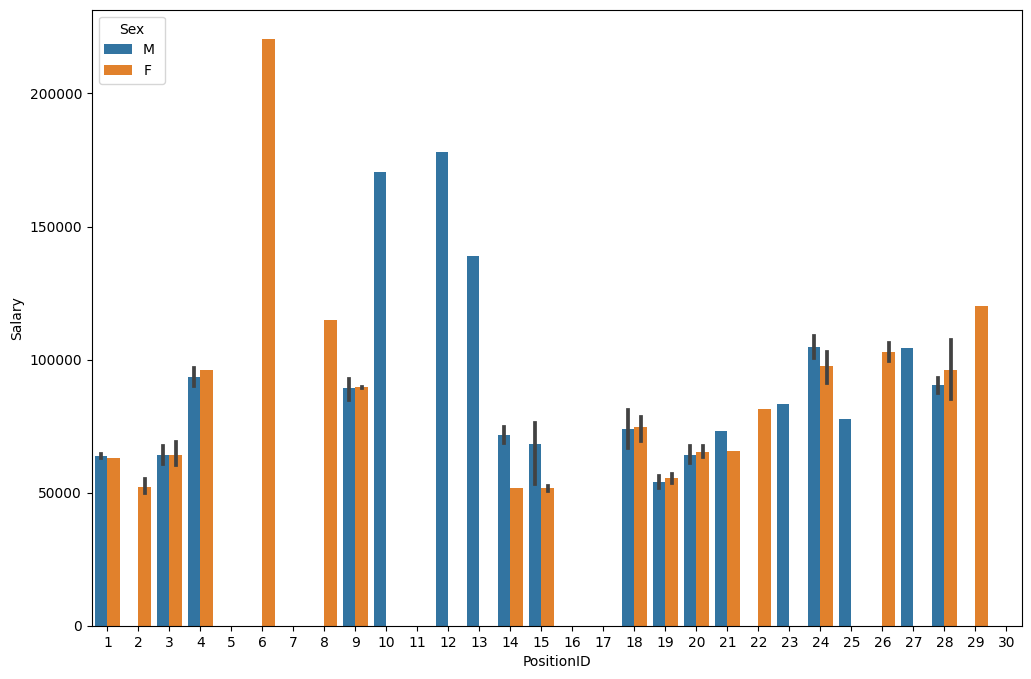

In [116]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x='PositionID',y='Salary',hue='Sex')

plt.show()

as we can see som

In [109]:
df_sex = df.copy()

In [112]:
sex_na = df_sex[df_sex['Sex'].isna()]

In [115]:
sex_na.value_counts(sex_na['PositionID'])

PositionID
19    32
3      8
20     7
8      3
14     3
4      1
5      1
9      1
11     1
13     1
18     1
21     1
24     1
27     1
dtype: int64